In [76]:
import pandas as pd
import numpy as np
from seaborn import pairplot
import seaborn as sns
from matplotlib.pyplot import hist,bar
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(20,7), 'figure.dpi':100})

In [94]:
ad_dat = pd.read_csv('/Users/lakeside/Documents/ENAR CONFERENCE/data_cleaned.csv')

In [95]:
ad_dat.head()

,row_id,year_start,year_end,location_abbr,location_desc,datasource,class,Caregiving,Cognitive_Decline,Mental_Health,...,data_value_type,data_value,low_confidence_limit,high_confidence_limit,age_range,gender,class_id,topic_id,question_id,location_id
0,2015~2015~01~Q40~AGE~65PLUS~GENDER~FEMALE,2015,2015,AL,Alabama,BRFSS,Caregiving,Provide care for someone with cognitive impair...,NaN,NaN,...,Percentage,10.0,6.5,15.1,65 years or older,Female,C07,TGC05,Q40,1
1,2015~2019~04~Q36~AGE~65PLUS~GENDER~FEMALE,2015,2019,AZ,Arizona,BRFSS,Caregiving,Provide care for a friend or family member in ...,NaN,NaN,...,Percentage,21.7,18.7,25.1,65 years or older,Female,C07,TGC01,Q36,4
2,2015~2019~05~Q37~AGE~65PLUS~GENDER~FEMALE,2015,2019,AR,Arkansas,BRFSS,Caregiving,Expect to provide care for someone in the next...,NaN,NaN,...,Percentage,10.6,7.8,14.4,65 years or older,Female,C07,TGC02,Q37,5
3,2015~2015~01~Q40~AGE~5064~GENDER~MALE,2015,2015,AL,Alabama,BRFSS,Caregiving,Provide care for someone with cognitive impair...,NaN,NaN,...,Percentage,9.6,5.6,15.8,50-64 years,Male,C07,TGC05,Q40,1
4,2017~2017~02~Q37~AGE~5064~GENDER~MALE,2017,2017,AK,Alaska,BRFSS,Caregiving,Expect to provide care for someone in the next...,NaN,NaN,...,Percentage,21.4,15.6,28.7,50-64 years,Male,C07,TGC02,Q37,2


In [96]:
ad_dat.shape

(25951, 25)

In [97]:
ad_dat.drop(columns=['row_id', 'year_start', 'year_end', 'location_desc',
       'datasource', 'class', 'question', 'data_value_type', 'class_id', 'topic_id', 'question_id',
       'location_id'], inplace=True)

In [98]:
pivot = ad_dat.pivot_table(index =['location_abbr', 'Cognitive_Decline'],
                       values =['data_value'],
                       aggfunc ='sum')
print(pivot)

                                                                  data_value
location_abbr Cognitive_Decline                                             
AK            Functional difficulties associated with subject...        57.4
              Subjective cognitive decline or memory loss amo...       104.0
              Talked with health care professional about subj...       282.6
AL            Functional difficulties associated with subject...       536.2
              Need assistance with day-to-day activities beca...       467.4
...                                                                      ...
WV            Talked with health care professional about subj...       557.5
WY            Functional difficulties associated with subject...       210.6
              Need assistance with day-to-day activities beca...       178.6
              Subjective cognitive decline or memory loss amo...        88.8
              Talked with health care professional about subj...       281.0

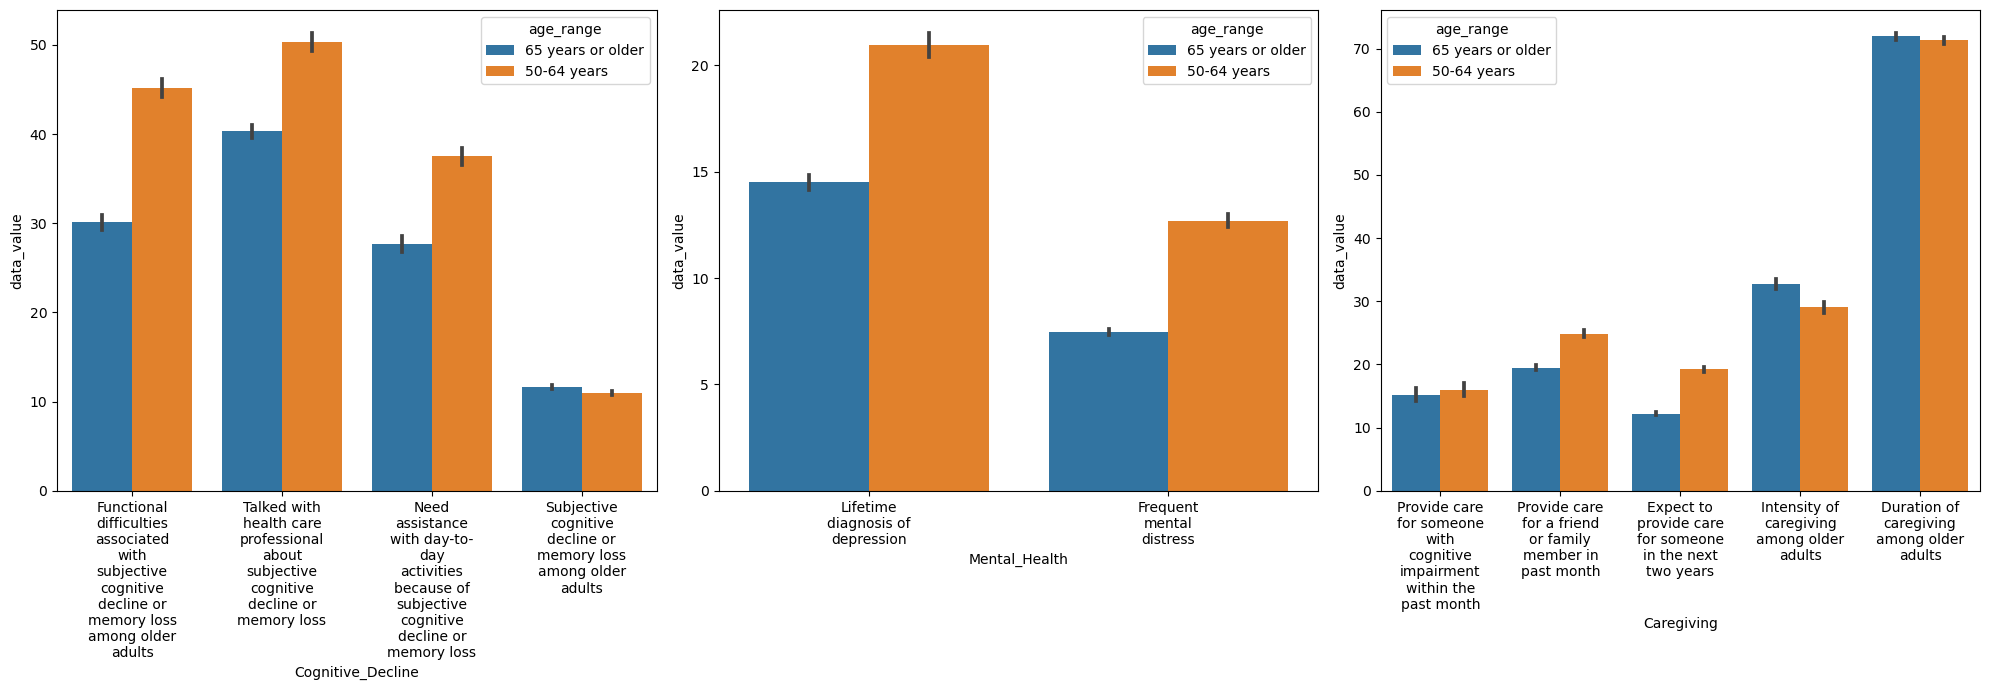

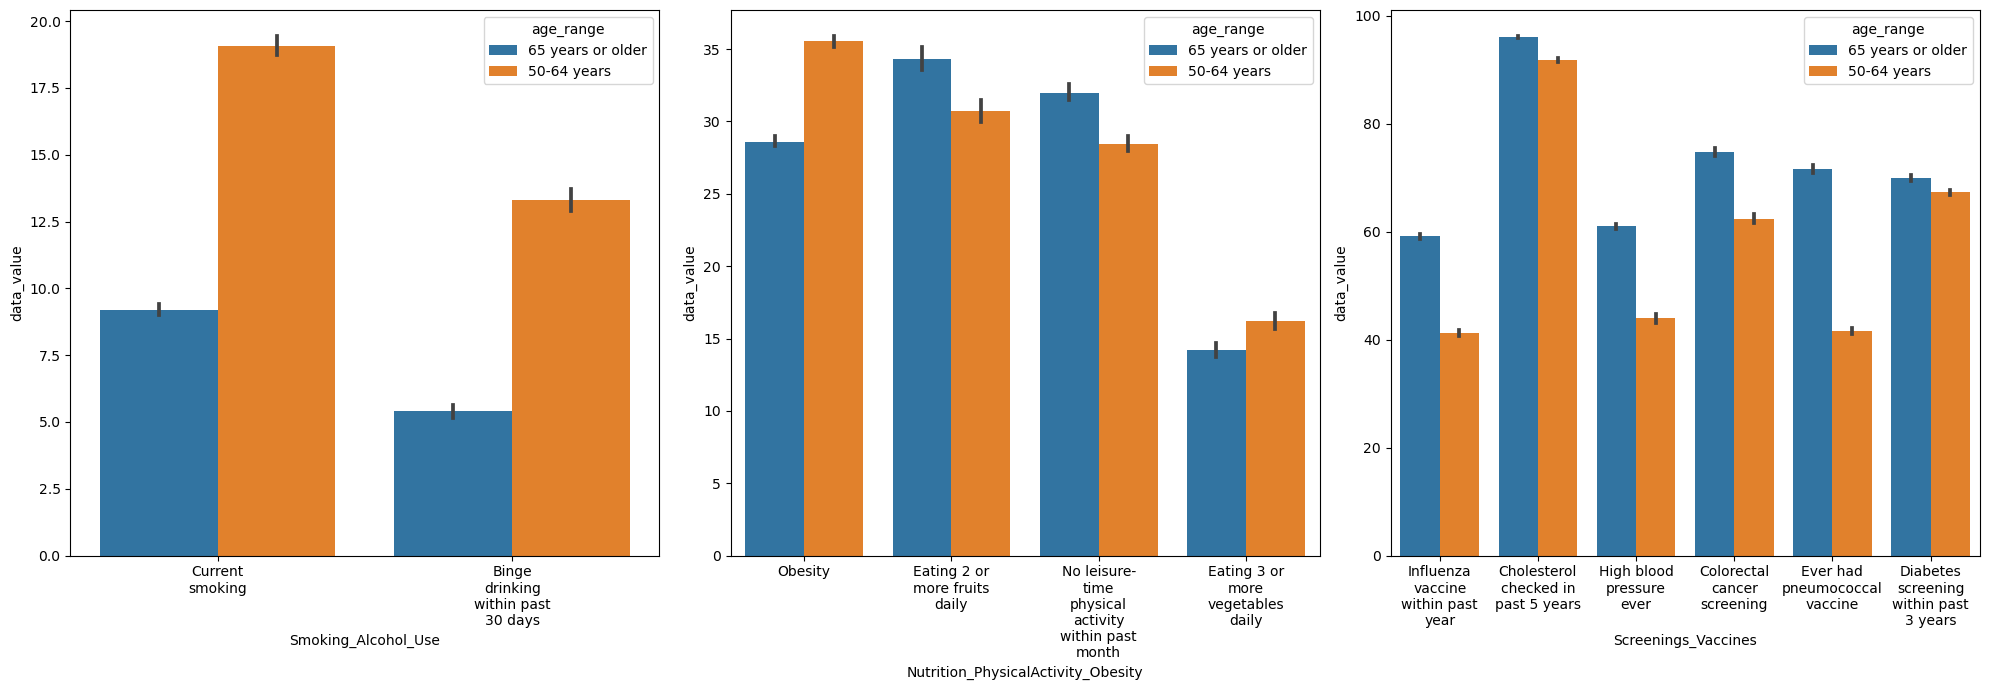

In [99]:
import textwrap

f, axs = plt.subplots(1, 3)
c = sns.barplot(data=ad_dat.query("Cognitive_Decline != 'NaN'")
                             , x="Cognitive_Decline", y="data_value", hue = "age_range", ax=axs[0])
m = sns.barplot(data=ad_dat.query("Mental_Health != 'NaN'")
                             , x="Mental_Health", y="data_value", hue = "age_range", ax=axs[1])
ca = sns.barplot(data=ad_dat.query("Caregiving != 'NaN'")
                           , x="Caregiving", y="data_value", hue = "age_range", ax=axs[2])

labels = [textwrap.fill(label.get_text(), 12) for label in c.get_xticklabels()]
c.set_xticklabels(labels)
labels = [textwrap.fill(label.get_text(), 12) for label in m.get_xticklabels()]
m.set_xticklabels(labels)
labels = [textwrap.fill(label.get_text(), 12) for label in ca.get_xticklabels()]
ca.set_xticklabels(labels)

f.tight_layout()


f, axs = plt.subplots(1, 3)
sa = sns.barplot(data=ad_dat.query("Smoking_Alcohol_Use != 'NaN'")
                           , x="Smoking_Alcohol_Use", y="data_value", hue = "age_range", ax=axs[0])
np = sns.barplot(data=ad_dat.query("Nutrition_PhysicalActivity_Obesity != 'NaN'")
                           , x="Nutrition_PhysicalActivity_Obesity", y="data_value", hue = "age_range", ax=axs[1])
sv = sns.barplot(data=ad_dat.query("Screenings_Vaccines != 'NaN'")
                           , x="Screenings_Vaccines", y="data_value", hue = "age_range", ax=axs[2])


labels = [textwrap.fill(label.get_text(), 12) for label in sa.get_xticklabels()]
sa.set_xticklabels(labels)
labels = [textwrap.fill(label.get_text(), 12) for label in np.get_xticklabels()]
np.set_xticklabels(labels)
labels = [textwrap.fill(label.get_text(), 12) for label in sv.get_xticklabels()]
sv.set_xticklabels(labels)


f.tight_layout()

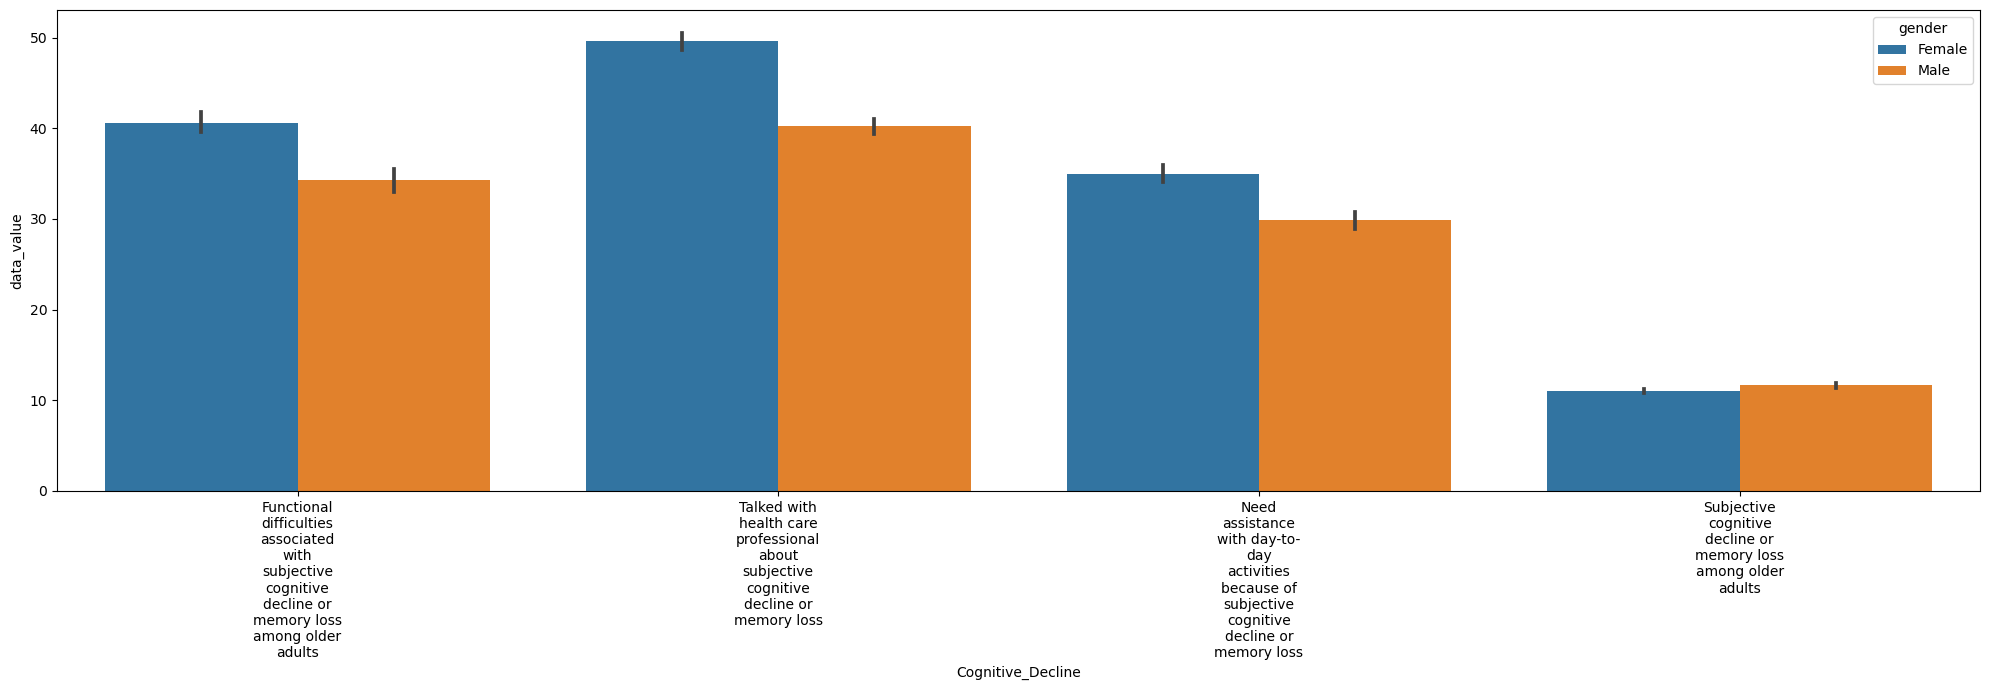

In [100]:
f, axs = plt.subplots(1, 1)
c = sns.barplot(data=ad_dat.query("Cognitive_Decline != 'NaN'")
                             , x="Cognitive_Decline", y="data_value", hue = "gender")
labels = [textwrap.fill(label.get_text(), 12) for label in c.get_xticklabels()]
c.set_xticklabels(labels)

f.tight_layout()

In [101]:
ad_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25951 entries, 0 to 25950
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   location_abbr                       25951 non-null  object 
 1   Caregiving                          2780 non-null   object 
 2   Cognitive_Decline                   2701 non-null   object 
 3   Mental_Health                       2293 non-null   object 
 4   Nutrition_PhysicalActivity_Obesity  3698 non-null   object 
 5   Screenings_Vaccines                 4815 non-null   object 
 6   Smoking_Alcohol_Use                 2266 non-null   object 
 7   Overall_Health                      7398 non-null   object 
 8   data_value                          25951 non-null  float64
 9   low_confidence_limit                25951 non-null  float64
 10  high_confidence_limit               25951 non-null  float64
 11  age_range                           25951

In [102]:
ad_dat.isnull().sum()

location_abbr                             0
Caregiving                            23171
Cognitive_Decline                     23250
Mental_Health                         23658
Nutrition_PhysicalActivity_Obesity    22253
Screenings_Vaccines                   21136
Smoking_Alcohol_Use                   23685
Overall_Health                        18553
data_value                                0
low_confidence_limit                      0
high_confidence_limit                     0
age_range                                 0
gender                                    0
dtype: int64

In [103]:
co_value_map = {
        'Functional difficulties associated with subjective cognitive decline or memory loss among older adults':1,
                'Talked with health care professional about subjective cognitive decline or memory loss':2,
                'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss':3,
               'Subjective cognitive decline or memory loss among older adults':4}
ad_dat['Cognitive_Decline'] = ad_dat['Cognitive_Decline'].apply(lambda x: co_value_map.get(x))

ca_value_map = {
        'Provide care for someone with cognitive impairment within the past month':1,
                'Provide care for a friend or family member in past month':2,
                'Expect to provide care for someone in the next two years':3,
               'Intensity of caregiving among older adults':4,
                'Duration of caregiving among older adults':5}
ad_dat['Caregiving'] = ad_dat['Caregiving'].apply(lambda x: ca_value_map.get(x))

mh_value_map = {'Frequent mental distress':1,
                'Lifetime diagnosis of depression':2}
ad_dat['Mental_Health'] = ad_dat['Mental_Health'].apply(lambda x: mh_value_map.get(x))

np_value_map = {'Eating 2 or more fruits daily':1,
                'Eating 3 or more vegetables daily':2,
                'No leisure-time physical activity within past month':3,
                'Obesity':4}
ad_dat['Nutrition_PhysicalActivity_Obesity'] = ad_dat['Nutrition_PhysicalActivity_Obesity'].apply(lambda x: np_value_map.get(x))

sv_value_map = {'Cholesterol checked in past 5 years':1,
                'Colorectal cancer screening':2,
                'Diabetes screening within past 3 years':3,
                'Ever had pneumococcal vaccine':4,
                'High blood pressure ever':5,
                'Influenza vaccine within past year':6,
                'Mammogram within past 2 years':7,
                'Pap test within past 3 years':8,
                'Up-to-date with recommended vaccines and screenings - Men':9,
                'Up-to-date with recommended vaccines and screenings - Women':10}
ad_dat['Screenings_Vaccines'] = ad_dat['Screenings_Vaccines'].apply(lambda x: sv_value_map.get(x))


oh_value_map = {'Arthritis among older adults':1,
                'Disability status, including sensory or mobility limitations':2,
                'Fair or poor health among older adults with arthritis':3,
                'Fall with injury within last year':4,
                'Oral health:  tooth retention':5,
                'Physically unhealthy days (mean number of days)':6,
                'Prevalence of sufficient sleep':7,
                'Recent activity limitations in past month':8,
                'Self-rated health (fair to poor health)':9,
                'Self-rated health (good to excellent health)':10,
                'Severe joint pain among older adults with arthritis':11,
                'Taking medication for high blood pressure':12}
ad_dat['Overall_Health'] = ad_dat['Overall_Health'].apply(lambda x: oh_value_map.get(x))


sa_value_map = {'Binge drinking within past 30 days':1,
                'Current smoking':2}
ad_dat['Smoking_Alcohol_Use'] = ad_dat['Smoking_Alcohol_Use'].apply(lambda x: sa_value_map.get(x))



In [104]:
#Fill Missing value with mode of the data
ad_dat = ad_dat.fillna(ad_dat.mode().iloc[0]) 

In [105]:
ad_dat.head()

,location_abbr,Caregiving,Cognitive_Decline,Mental_Health,Nutrition_PhysicalActivity_Obesity,Screenings_Vaccines,Smoking_Alcohol_Use,Overall_Health,data_value,low_confidence_limit,high_confidence_limit,age_range,gender
0,AL,1.0,4.0,2.0,3.0,6.0,2.0,9.0,10.0,6.5,15.1,65 years or older,Female
1,AZ,2.0,4.0,2.0,3.0,6.0,2.0,9.0,21.7,18.7,25.1,65 years or older,Female
2,AR,3.0,4.0,2.0,3.0,6.0,2.0,9.0,10.6,7.8,14.4,65 years or older,Female
3,AL,1.0,4.0,2.0,3.0,6.0,2.0,9.0,9.6,5.6,15.8,50-64 years,Male
4,AK,3.0,4.0,2.0,3.0,6.0,2.0,9.0,21.4,15.6,28.7,50-64 years,Male


In [106]:
#display(ad_dat.iloc[2783])

In [107]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label encoder and return encoded label
label_gen = le.fit_transform(ad_dat['gender'])
label_age = le.fit_transform(ad_dat['age_range'])

In [108]:
ad_dat.drop(columns=["gender","age_range", "location_abbr"], axis=1, inplace=True)
 
# Appending the array to our dataFrame

ad_dat["gender"] = label_gen
ad_dat["age_range"] = label_age

# printing Dataframe
ad_dat.head()

,Caregiving,Cognitive_Decline,Mental_Health,Nutrition_PhysicalActivity_Obesity,Screenings_Vaccines,Smoking_Alcohol_Use,Overall_Health,data_value,low_confidence_limit,high_confidence_limit,gender,age_range
0,1.0,4.0,2.0,3.0,6.0,2.0,9.0,10.0,6.5,15.1,0,1
1,2.0,4.0,2.0,3.0,6.0,2.0,9.0,21.7,18.7,25.1,0,1
2,3.0,4.0,2.0,3.0,6.0,2.0,9.0,10.6,7.8,14.4,0,1
3,1.0,4.0,2.0,3.0,6.0,2.0,9.0,9.6,5.6,15.8,1,0
4,3.0,4.0,2.0,3.0,6.0,2.0,9.0,21.4,15.6,28.7,1,0


In [109]:
ad_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25951 entries, 0 to 25950
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Caregiving                          25951 non-null  float64
 1   Cognitive_Decline                   25951 non-null  float64
 2   Mental_Health                       25951 non-null  float64
 3   Nutrition_PhysicalActivity_Obesity  25951 non-null  float64
 4   Screenings_Vaccines                 25951 non-null  float64
 5   Smoking_Alcohol_Use                 25951 non-null  float64
 6   Overall_Health                      25951 non-null  float64
 7   data_value                          25951 non-null  float64
 8   low_confidence_limit                25951 non-null  float64
 9   high_confidence_limit               25951 non-null  float64
 10  gender                              25951 non-null  int64  
 11  age_range                           25951

In [110]:
ad_dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25951 entries, 0 to 25950
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   location_abbr                       25951 non-null  object 
 1   Caregiving                          2780 non-null   object 
 2   Cognitive_Decline                   2701 non-null   object 
 3   Mental_Health                       2293 non-null   object 
 4   Nutrition_PhysicalActivity_Obesity  3698 non-null   object 
 5   Screenings_Vaccines                 4815 non-null   object 
 6   Smoking_Alcohol_Use                 2266 non-null   object 
 7   Overall_Health                      7398 non-null   object 
 8   data_value                          25951 non-null  float64
 9   low_confidence_limit                25951 non-null  float64
 10  high_confidence_limit               25951 non-null  float64
 11  age_range                           25951

In [111]:
ad_dat['data_value'] = ad_dat['data_value'].astype(int)
ad_dat['low_confidence_limit'] = ad_dat['low_confidence_limit'].astype(int)
ad_dat['high_confidence_limit'] = ad_dat['high_confidence_limit'].astype(int)
ad_dat['Overall_Health'] = ad_dat['Overall_Health'].astype(int)
ad_dat['Smoking_Alcohol_Use'] = ad_dat['Smoking_Alcohol_Use'].astype(int)
ad_dat['Screenings_Vaccines'] = ad_dat['Screenings_Vaccines'].astype(int)
ad_dat['Nutrition_PhysicalActivity_Obesity'] = ad_dat['Nutrition_PhysicalActivity_Obesity'].astype(int)
ad_dat['Mental_Health'] = ad_dat['Mental_Health'].astype(int)
ad_dat['Cognitive_Decline'] = ad_dat['Cognitive_Decline'].astype(int)
ad_dat['Caregiving'] = ad_dat['Caregiving'].astype(int)


ad_dat.dtypes

Caregiving                            int64
Cognitive_Decline                     int64
Mental_Health                         int64
Nutrition_PhysicalActivity_Obesity    int64
Screenings_Vaccines                   int64
Smoking_Alcohol_Use                   int64
Overall_Health                        int64
data_value                            int64
low_confidence_limit                  int64
high_confidence_limit                 int64
gender                                int64
age_range                             int64
dtype: object

In [113]:
ad_dat.corr()

,Caregiving,Cognitive_Decline,Mental_Health,Nutrition_PhysicalActivity_Obesity,Screenings_Vaccines,Smoking_Alcohol_Use,Overall_Health,data_value,low_confidence_limit,high_confidence_limit,gender,age_range
Caregiving,1.000000,0.055269,0.044985,0.017528,0.074900,0.044405,0.059023,0.129811,0.099479,0.154158,0.004683,-0.000470
Cognitive_Decline,0.055269,1.000000,-0.056607,-0.022056,-0.094251,-0.055878,-0.074272,-0.012151,0.058306,-0.090266,0.014266,-0.003461
Mental_Health,0.044985,-0.056607,1.000000,-0.017952,-0.076714,-0.045480,-0.060452,0.244760,0.229752,0.258517,-0.001392,0.001429
Nutrition_PhysicalActivity_Obesity,0.017528,-0.022056,-0.017952,1.000000,-0.029891,-0.017721,-0.023555,0.061684,0.058681,0.064156,-0.000065,-0.000248
Screenings_Vaccines,0.074900,-0.094251,-0.076714,-0.029891,1.000000,-0.075725,-0.100654,-0.506927,-0.521893,-0.486010,-0.002561,-0.001130
Smoking_Alcohol_Use,0.044405,-0.055878,-0.045480,-0.017721,-0.075725,1.000000,-0.059673,0.246911,0.231510,0.261130,-0.009351,0.006783
Overall_Health,0.059023,-0.074272,-0.060452,-0.023555,-0.100654,-0.059673,1.000000,0.067751,0.063682,0.071709,-0.001769,-0.000430
data_value,0.129811,-0.012151,0.244760,0.061684,-0.506927,0.246911,0.067751,1.000000,0.993031,0.991892,-0.044873,0.025680
low_confidence_limit,0.099479,0.058306,0.229752,0.058681,-0.521893,0.231510,0.063682,0.993031,1.000000,0.970726,-0.052954,0.038380
high_confidence_limit,0.154158,-0.090266,0.258517,0.064156,-0.486010,0.261130,0.071709,0.991892,0.970726,1.000000,-0.034469,0.013970


In [117]:
ca = ad_dat['age_range'].corr(ad_dat['data_value'])
ca

0.025680424399714637

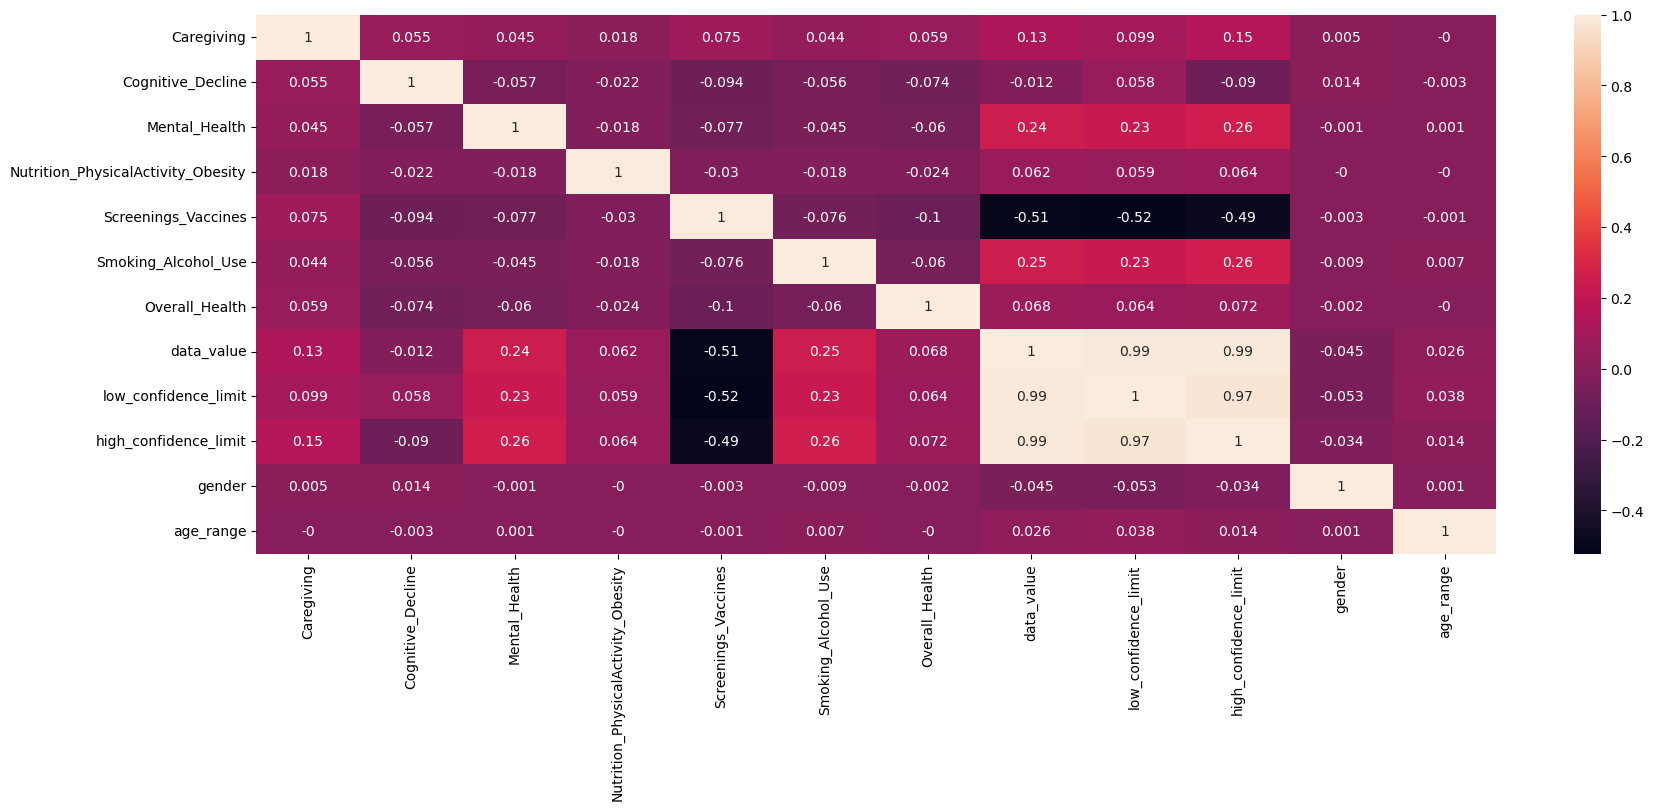

In [118]:
sns.heatmap(ad_dat.corr().round(3), annot=True)
plt.show()

In [119]:
ad_dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Caregiving,25951.0,2.118300,0.564486,1.0,2.0,2.0,2.0,5.0
Cognitive_Decline,25951.0,3.848252,0.575425,1.0,4.0,4.0,4.0,4.0
Mental_Health,25951.0,1.955955,0.205198,1.0,2.0,2.0,2.0,2.0
Nutrition_PhysicalActivity_Obesity,25951.0,2.964857,0.420200,1.0,3.0,3.0,3.0,4.0
Screenings_Vaccines,25951.0,5.604100,1.107768,1.0,6.0,6.0,6.0,6.0
Smoking_Alcohol_Use,25951.0,1.957034,0.202783,1.0,2.0,2.0,2.0,2.0
Overall_Health,25951.0,8.358175,2.278980,1.0,9.0,9.0,9.0,12.0
data_value,25951.0,37.828947,24.704998,1.0,18.0,32.0,57.0,99.0
low_confidence_limit,25951.0,33.646256,24.324475,0.0,14.0,27.0,52.0,98.0
high_confidence_limit,25951.0,42.294208,24.974489,1.0,21.0,37.0,62.0,99.0


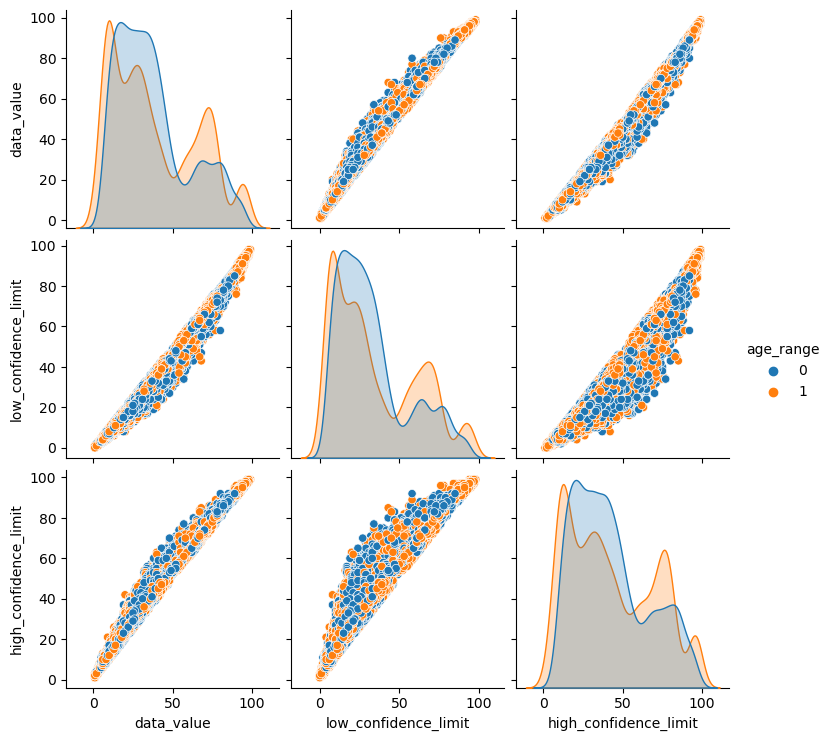

In [120]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cols_to_plot = ad_dat.columns[7:10].tolist() + ['age_range'] 
sns.pairplot(ad_dat[cols_to_plot], hue='age_range')
plt.show()

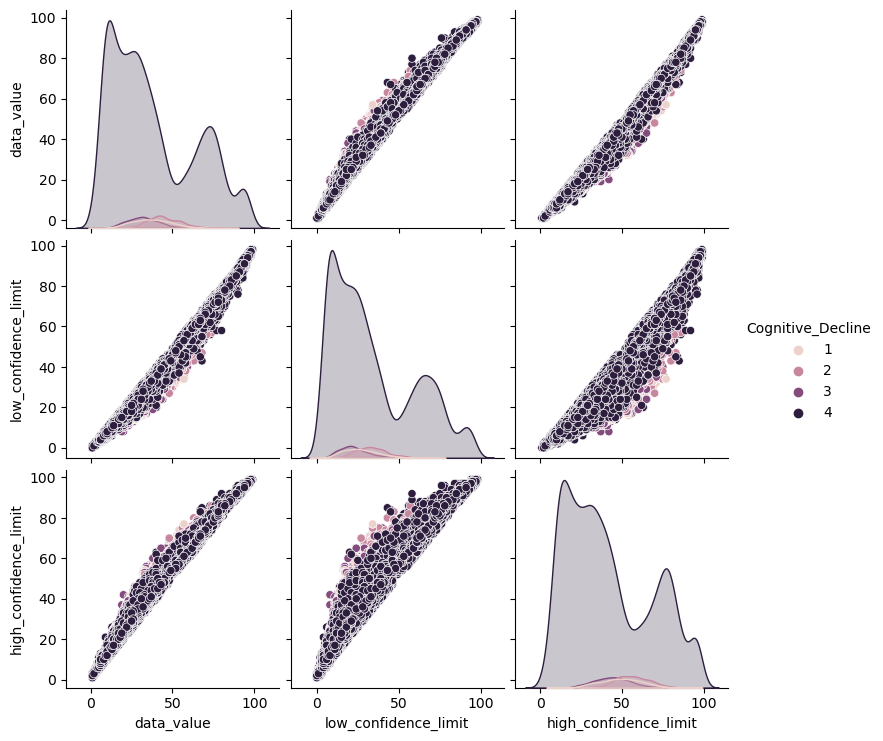

In [121]:
cols_to_plot = ad_dat.columns[7:10].tolist() + ['Cognitive_Decline'] 
sns.pairplot(ad_dat[cols_to_plot], hue='Cognitive_Decline')
plt.show()

In [122]:
# Splitting our data
X = ad_dat[['data_value', 'low_confidence_limit', 'high_confidence_limit', 'Cognitive_Decline', 
            'Mental_Health', 'Smoking_Alcohol_Use', 'Caregiving', 
            'Nutrition_PhysicalActivity_Obesity', 'Overall_Health']]
y = ad_dat['age_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [123]:
classifier = svm.SVC(kernel='linear', gamma ='auto', C = 1.0)

classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print(y_predict)

[1 0 1 ... 0 0 1]


In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      3284
           1       0.55      0.68      0.61      3204

    accuracy                           0.57      6488
   macro avg       0.57      0.57      0.56      6488
weighted avg       0.57      0.57      0.56      6488



In [125]:
print(accuracy_score(y_test, y_predict))

0.5690505548705302


AttributeError: 'AxesSubplot' object has no attribute 'linspace'

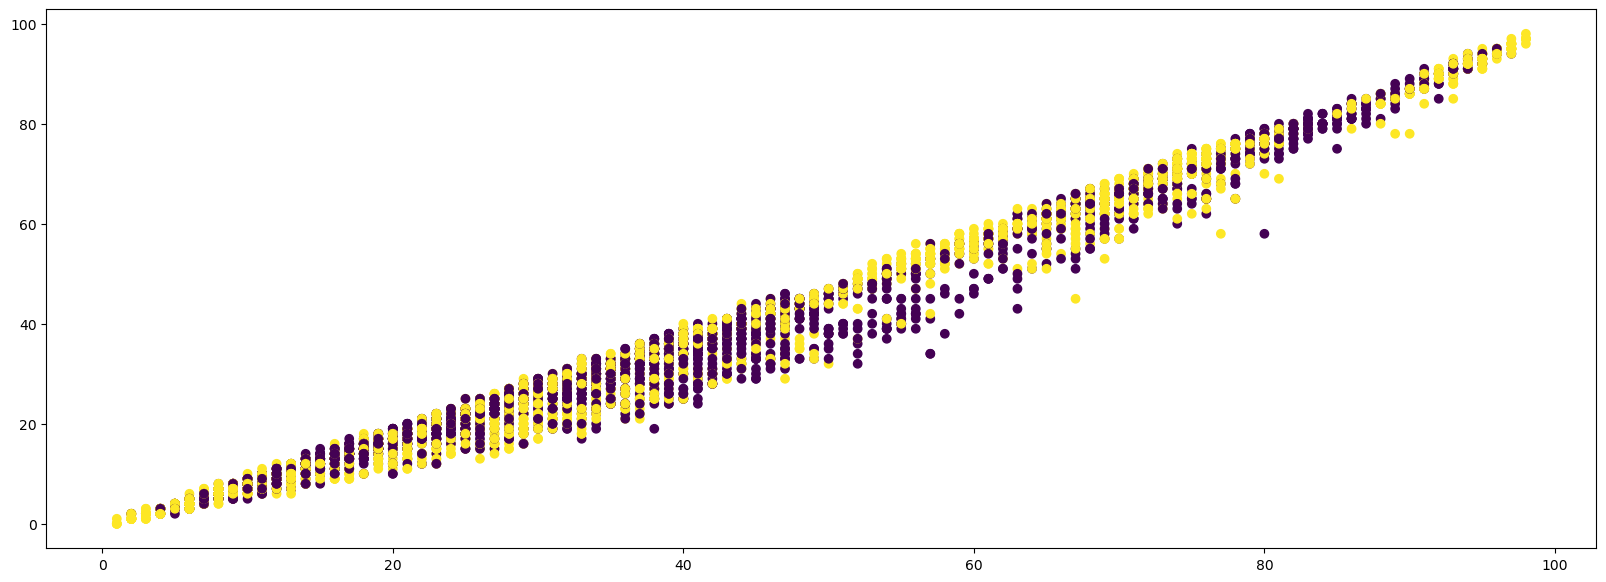

In [130]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test)

w = classifier.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(100, 100)
yy = a * xx - (classifier.intercept_[0])/w[1]

plt.plot(xx,yy)
plt.axis('off'), plt.show();

In [149]:
classifier_rbf = svm.SVC(kernel='rbf', gamma =0.5, C = 7, probability = True)

classifier_rbf.fit(X_train, y_train)
y_predict = classifier_rbf.predict(X_test)

In [150]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      3284
           1       0.71      0.73      0.72      3204

    accuracy                           0.72      6488
   macro avg       0.72      0.72      0.72      6488
weighted avg       0.72      0.72      0.72      6488



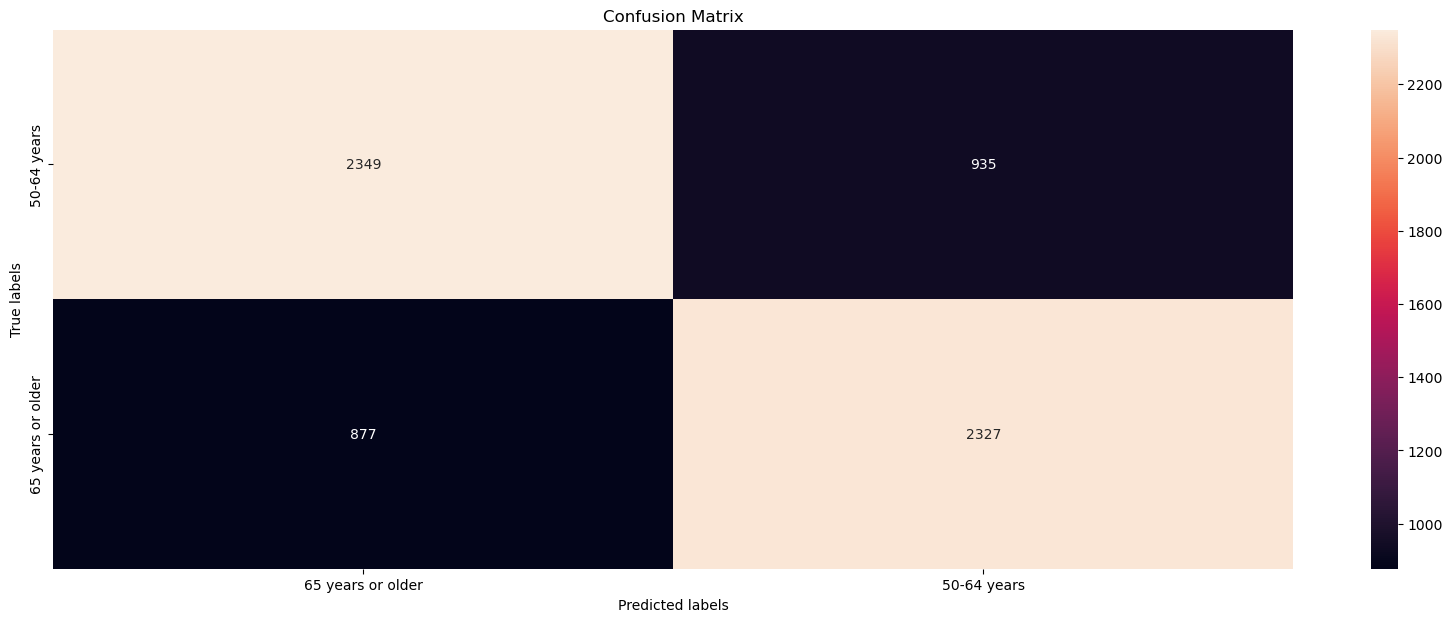

In [139]:
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_predict)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['65 years or older', '50-64 years']); ax.yaxis.set_ticklabels(['50-64 years', '65 years or older']);


In [152]:
y_train_pred = classifier_rbf.predict_proba(X_train)[:,1]    
y_test_pred = classifier_rbf.predict_proba(X_test)[:,1]   

In [140]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

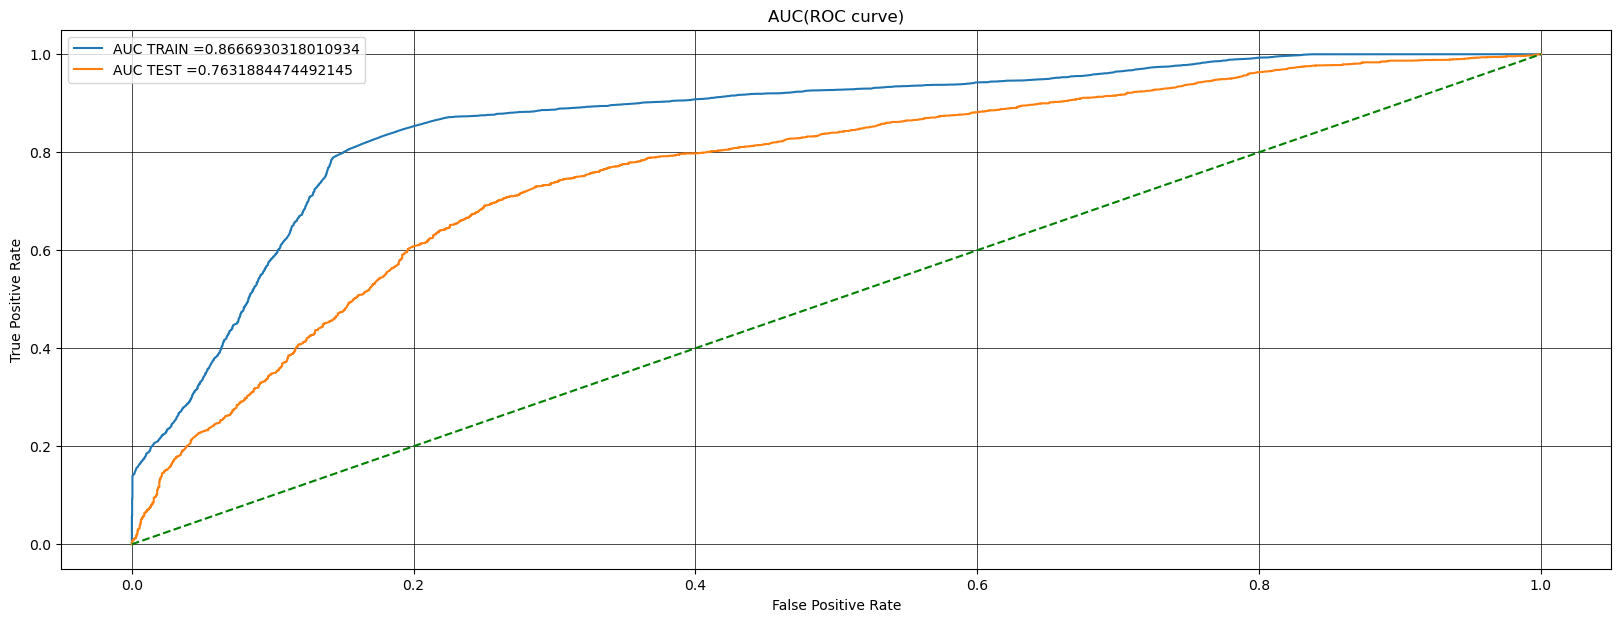

In [162]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds  = metrics.roc_curve(y_test, y_test_pred)
auc1 = metrics.roc_auc_score(y_train, y_train_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label="AUC TRAIN ="+str(auc1))
plt.plot(test_fpr, test_tpr, label="AUC TEST ="+str(auc))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [158]:
metrics.auc(train_fpr, train_tpr)

0.8666930318010934